Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.3  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **4. studenog 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

1.0
7


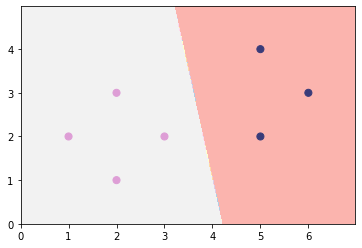

In [5]:
# Vaš kôd ovdje
clf = RidgeClassifier(alpha = 0).fit(seven_X, seven_y)
accuracy = accuracy_score(seven_y, clf.predict(seven_X))
print(accuracy)
mlutils.plot_2d_clf_problem(seven_X, seven_y, clf.predict)
print(len(seven_y))



Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

1.0


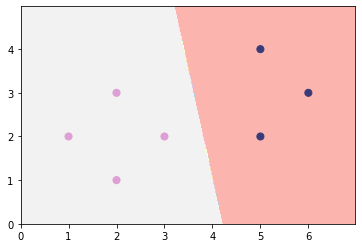

In [6]:
# Vaš kôd ovdje
reg = LinearRegression().fit(seven_X, seven_y)
accuracy = accuracy_score(seven_y, reg.predict(seven_X) >= 0.5)
print(accuracy)
mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x: reg.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

0.875


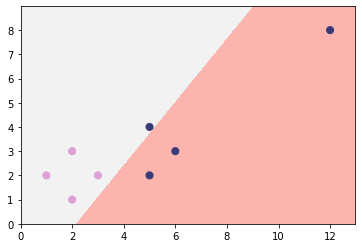

In [8]:
# Vaš kôd ovdje
clf1 = RidgeClassifier(alpha = 0).fit(outlier_X, outlier_y)
accuracy = accuracy_score(outlier_y, clf1.predict(outlier_X))
print(accuracy)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, clf1.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

0.875


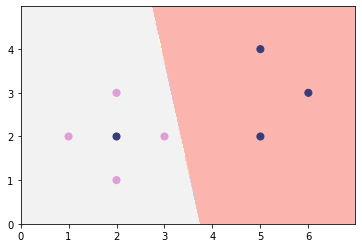

In [10]:
# Vaš kôd ovdje
clf2 = RidgeClassifier(alpha = 0).fit(unsep_X, unsep_y)
accuracy = accuracy_score(unsep_y, clf2.predict(unsep_X))
print(accuracy)
mlutils.plot_2d_clf_problem(unsep_X, unsep_y, clf2.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [11]:
from sklearn.datasets import make_classification

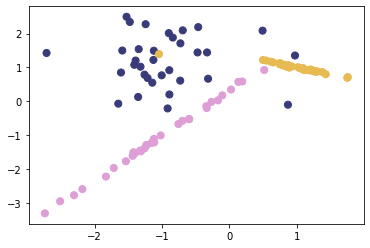

In [12]:
# Vaš kôd ovdje
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

x, y= make_classification(n_features = 2, n_redundant = 0, n_classes = 3, n_clusters_per_class = 1)

mlutils.plot_2d_clf_problem(x, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

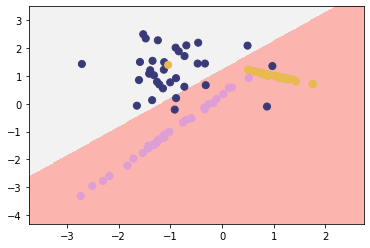

In [13]:
#klasa 0 i ostale
y0 = y.copy()
y0[ y0 == 1] = 2
y0[ y0 == 0] = 1
y0[ y0 == 2 ] = 0
reg0 = LinearRegression().fit(x, y0)

mlutils.plot_2d_clf_problem(x, y, lambda x: reg0.predict(x) >= 0.5)


    

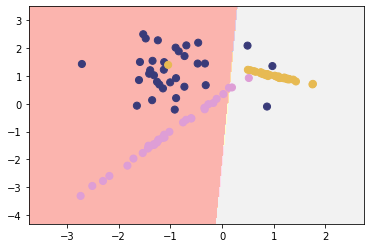

In [14]:
y1 = y.copy()
y1[y1 != 1] = 0

reg1 = LinearRegression().fit(x, y1)

mlutils.plot_2d_clf_problem(x, y, lambda x: reg1.predict(x) >= 0.5)

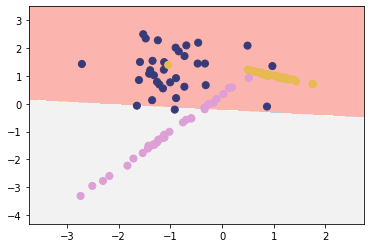

In [15]:
y2 = y.copy()
y2[y2 != 2] = 0
y2[y2 == 2] = 1

reg2 = LinearRegression().fit(x, y2)
mlutils.plot_2d_clf_problem(x, y, lambda x: reg2.predict(x) >= 0.5)

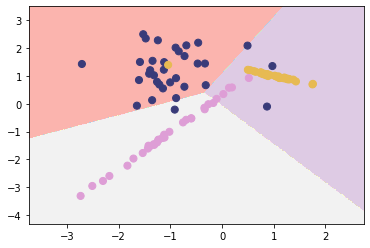

In [16]:
def predict(x):
    return (np.argmax([reg0.predict([x]), reg1.predict([x]), reg2.predict([x])]))
    
mlutils.plot_2d_clf_problem(x, y, lambda x: predict(x))

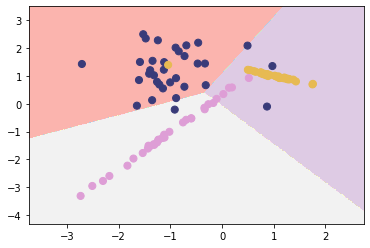

In [17]:
# Vaš kôd ovdje
clf = RidgeClassifier(alpha = 0).fit(x, y)
mlutils.plot_2d_clf_problem(x, y, clf.predict)



### 3. Logistička regresija

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

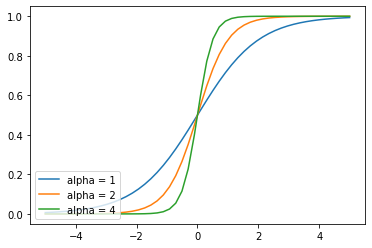

In [18]:
# Vaš kôd ovdje
def sigm(x, alpha = 1):
    return 1/(1 + np.exp(-alpha * x))

x = np.linspace(-5, 5)
for alpha in [1, 2, 4]:
    plt.plot(x, sigm(x, alpha), label = "alpha = %d" %alpha)

plt.legend(loc="lower left")

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [19]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x, w): 
    # Vaš kôd ovdje
    return sigm(x.dot(w))

def cross_entropy_error(X, y, w): 
    # Vaš kôd ovdje
    sum = 0
    for i in range(len(y)):
        h = lr_h(X[i], w)
        sum += -y[i] * np.log(h) - (1 - y[i]) * np.log(1 - h)

    return sum/len(y)
    

def lr_train(X, y, eta=0.01, max_iter=2000, trace=False, alpha=0, epsilon=0.00001):
    # Vaš kôd ovdje
    poly = PolynomialFeatures(1)
    phi = poly.fit_transform(X)
    w_list = []
    w = np.zeros(len(phi[0]))
    error = cross_entropy_error(phi, y, w)
    
    for iteration in range(0, max_iter):
        delta_w0 = 0
        delta_w = np.zeros(len(X[0]))
        for i in range(0, len(y)):
            h = lr_h(phi[i], w)
            delta_w0 += h - y[i]
            delta_w += (h - y[i]) * X[i]
        w[0] -= eta * delta_w0
        w[1:] = w[1:] * (1 - eta * alpha) - eta * delta_w
        
        new_error = cross_entropy_error(phi, y, w)
        w_list.append(w.copy())
        if abs(new_error - error) < epsilon:
            error = new_error
            if trace:
                return w, w_list
            else:
                return w
        
        error = new_error
    if trace:
        return w, w_list
    else:
        return w
    
        

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

[ 6.44150959 -2.11012128  0.53522851]
0.07751718252492555


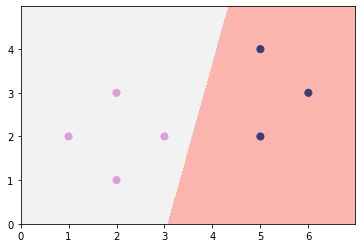

In [20]:
# Vaš kôd ovdje    
w = lr_train(X = seven_X, y = seven_y)
poly = PolynomialFeatures(1)
print (w)
error = cross_entropy_error(poly.fit_transform(seven_X), seven_y, w)
print(error)

mlutils.plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(poly.fit_transform(x), w) >= 0.5)


**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

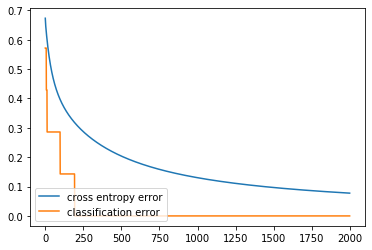

In [21]:
# Vaš kôd ovdje
def classification_error(X, y, w):
    sum = 0
    for i in range(len(y)):
        h = lr_h(X[i], w)
        if h >= 0.5:
            h = 1
        else:
            h = 0
        
        sum += abs(y[i] - h)

    return sum/len(y)
        
w, w_list = lr_train(X = seven_X, y = seven_y, trace = True)
entropy_error = []
class_error = []
for weights in w_list:
    entropy_error.append(cross_entropy_error(poly.fit_transform(seven_X), seven_y, weights))
    class_error.append(classification_error(poly.fit_transform(seven_X), seven_y, weights))

plt.plot(range(len(w_list)), entropy_error, label = "cross entropy error")
plt.plot(range(len(w_list)), class_error, label = "classification error")
plt.legend(loc="lower left")




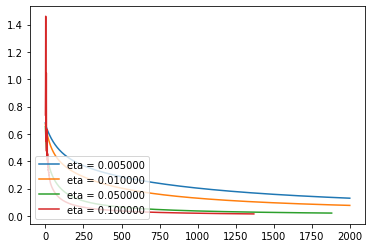

In [22]:
for eta in [0.005, 0.01, 0.05, 0.1]:
    w, w_list = lr_train(X = seven_X, y = seven_y, trace = True, eta = eta)
    entropy_error = []

    for weights in w_list:
        entropy_error.append(cross_entropy_error(poly.fit_transform(seven_X), seven_y, weights))    

    plt.plot(range(len(w_list)), entropy_error, label = "eta = %f" %eta)

plt.legend(loc="lower left")


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [23]:
from sklearn.linear_model import LogisticRegression

C:\Users\barzi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[-2.44484337  0.35101133]]


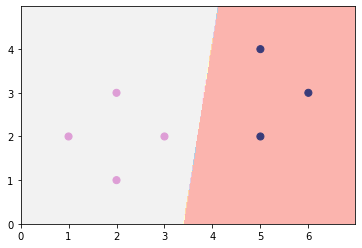

In [24]:
# Vaš kôd ovdje
clf = LogisticRegression(max_iter = 2000, tol = 0.0001, C = 100).fit(seven_X, seven_y)
print(clf.coef_)

mlutils.plot_2d_clf_problem(seven_X, seven_y, clf.predict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

C:\Users\barzi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


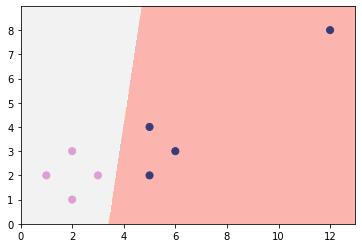

In [25]:
# Vaš kôd ovdje
clf = LogisticRegression(max_iter = 2000, tol = 0.00001, C = 100).fit(outlier_X, outlier_y)
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, clf.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


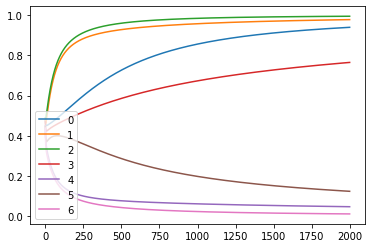

In [26]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
phi = poly.fit_transform(seven_X)
w, w_list = lr_train(X = seven_X, y = seven_y, trace = True)

for i in range(7):
    h = []
    
    for weights in w_list:
        h.append(lr_h(phi[i], weights)) 
    
    plt.plot(range(len(w_list)), h, label = "%d" %i)
        
plt.legend(loc = "lower left")


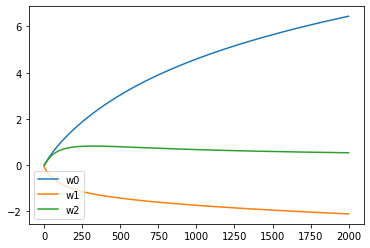

In [27]:
poly = PolynomialFeatures(1)
phi = poly.fit_transform(seven_X)
w, w_list = lr_train(X = seven_X, y = seven_y, trace = True)
w0 = []
w1 = []
w2 = []

for weights in w_list:
    w0.append(weights[0])
    w1.append(weights[1])
    w2.append(weights[2])
    
plt.plot(range(len(w_list)), w0, label = "w0")
plt.plot(range(len(w_list)), w1, label = "w1")
plt.plot(range(len(w_list)), w2, label = "w2")
        
plt.legend(loc = "lower left")

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

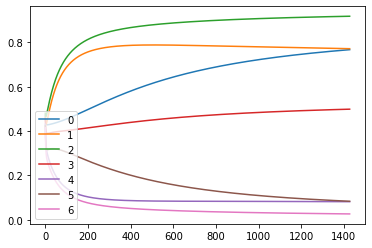

In [28]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
phi = poly.fit_transform(unsep_X)
w, w_list = lr_train(X = unsep_X, y = unsep_y, trace = True)

for i in range(7):
    h = []
    
    for weights in w_list:
        h.append(lr_h(phi[i], weights)) 
    
    plt.plot(range(len(w_list)), h, label = "%d" %i)
        
plt.legend(loc = "lower left")

In [ ]:
poly = PolynomialFeatures(1)
phi = poly.fit_transform(unsep_X)
w, w_list = lr_train(X = unsep_X, y = unsep_y, trace = True)
w0 = []
w1 = []
w2 = []

for weights in w_list:
    w0.append(weights[0])
    w1.append(weights[1])
    w2.append(weights[2])
    
plt.plot(range(len(w_list)), w0, label = "w0")
plt.plot(range(len(w_list)), w1, label = "w1")
plt.plot(range(len(w_list)), w2, label = "w2")
        
plt.legend(loc = "lower left")

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [29]:
from numpy.linalg import norm

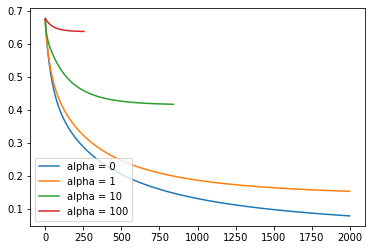

In [30]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
for alpha in [0, 1, 10, 100]:
    w, w_list = lr_train(X = seven_X, y = seven_y, trace = True, alpha = alpha)
    error = []
    for weights in w_list:
        error.append(cross_entropy_error(poly.fit_transform(seven_X), seven_y, weights))
    
    plt.plot(range(len(w_list)), error, label = "alpha = %d" %alpha)

plt.legend(loc = "lower left")
    

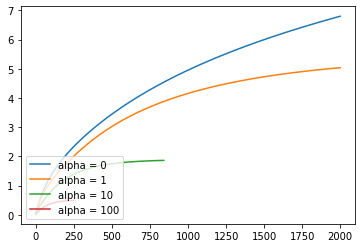

In [31]:
poly = PolynomialFeatures(1)
for alpha in [0, 1, 10, 100]:
    w, w_list = lr_train(X = seven_X, y = seven_y, trace = True, alpha = alpha)
    norms = []
    for weights in w_list:
        norms.append(norm(weights))
    
    plt.plot(range(len(w_list)), norms, label = "alpha = %d" %alpha)

plt.legend(loc = "lower left")

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [32]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

C:\Users\barzi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


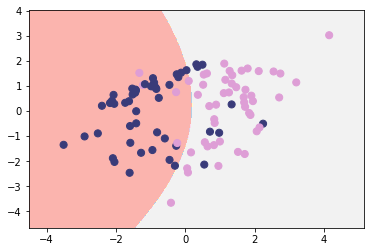

In [33]:
# Vaš kôd ovdje
x, y= make_classification(n_features = 2, n_redundant = 0, n_classes = 2, n_clusters_per_class = 2)


poly = PolynomialFeatures(2)
clf = LogisticRegression().fit(poly.fit_transform(x), y)
mlutils.plot_2d_clf_problem(x, y, lambda x: clf.predict(poly.fit_transform(x)))
    

C:\Users\barzi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


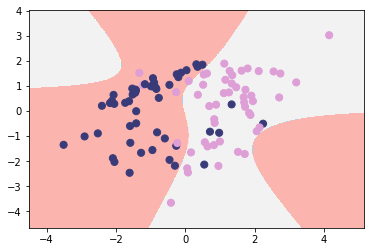

In [34]:
poly = PolynomialFeatures(3)
clf = LogisticRegression(max_iter = 2000, tol = 0.00001, C = 100).fit(poly.fit_transform(x), y)
mlutils.plot_2d_clf_problem(x, y, lambda x: clf.predict(poly.fit_transform(x)))
    

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?